In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import EfficientNetB3

import warnings
warnings.filterwarnings("ignore")

In [2]:
def train_df(tr_path):
    classes = []
    class_paths = []
    files = os.listdir(tr_path)
    for file in files:
        label_dir = os.path.join(tr_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    tr_df = pd.concat([image_paths, image_classes], axis=1)
    return tr_df

In [4]:
tr_df = train_df(r"C:\\Users\\apoor\\Desktop\\SEMESTER 6\\Machine Learning\\CNN\\data")

In [5]:
tr_df

,Class Path,Class
0,C:\\Users\\apoor\\Desktop\\SEMESTER 6\\Machine...,happy
1,C:\\Users\\apoor\\Desktop\\SEMESTER 6\\Machine...,happy
2,C:\\Users\\apoor\\Desktop\\SEMESTER 6\\Machine...,happy
3,C:\\Users\\apoor\\Desktop\\SEMESTER 6\\Machine...,happy
4,C:\\Users\\apoor\\Desktop\\SEMESTER 6\\Machine...,happy
...,...,...
449,C:\\Users\\apoor\\Desktop\\SEMESTER 6\\Machine...,sad
450,C:\\Users\\apoor\\Desktop\\SEMESTER 6\\Machine...,sad
451,C:\\Users\\apoor\\Desktop\\SEMESTER 6\\Machine...,sad
452,C:\\Users\\apoor\\Desktop\\SEMESTER 6\\Machine...,sad


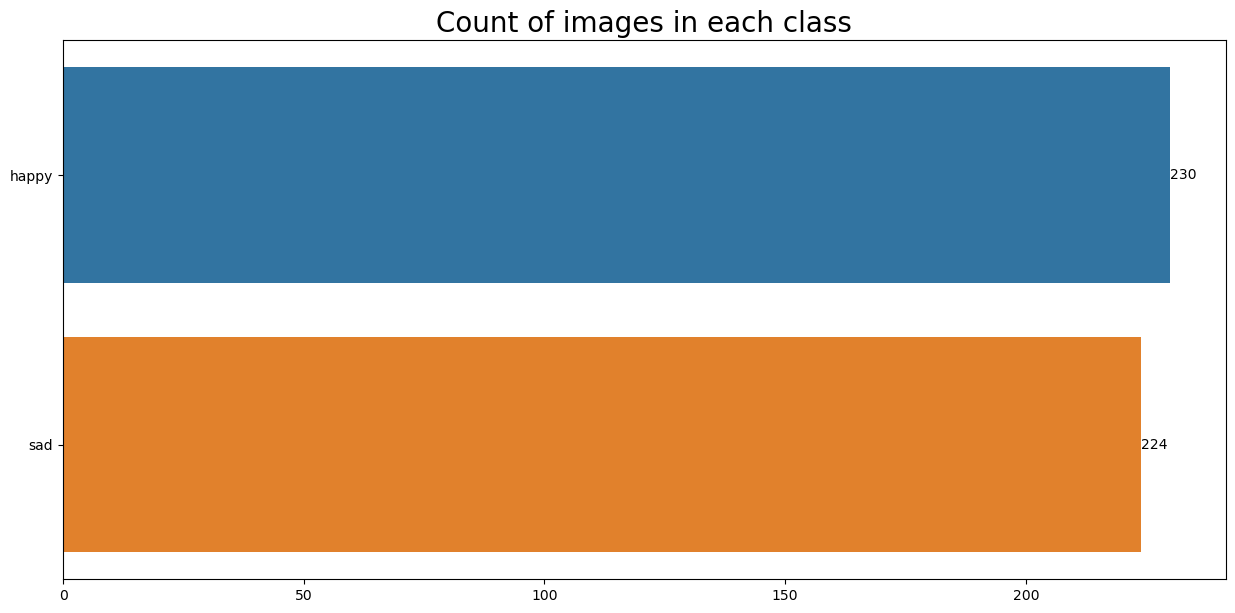

In [6]:
# Count of images in each class
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

In [7]:
tr_df, ts_df = train_test_split(tr_df,  train_size= 0.8, shuffle= True, random_state= 20)
valid_df, ts_df = train_test_split(ts_df,  train_size= 0.5, shuffle= True, random_state= 20)

In [8]:
valid_df

,Class Path,Class
379,C:\\Users\\apoor\\Desktop\\SEMESTER 6\\Machine...,sad
378,C:\\Users\\apoor\\Desktop\\SEMESTER 6\\Machine...,sad
217,C:\\Users\\apoor\\Desktop\\SEMESTER 6\\Machine...,happy
30,C:\\Users\\apoor\\Desktop\\SEMESTER 6\\Machine...,happy
400,C:\\Users\\apoor\\Desktop\\SEMESTER 6\\Machine...,sad
181,C:\\Users\\apoor\\Desktop\\SEMESTER 6\\Machine...,happy
309,C:\\Users\\apoor\\Desktop\\SEMESTER 6\\Machine...,sad
285,C:\\Users\\apoor\\Desktop\\SEMESTER 6\\Machine...,sad
197,C:\\Users\\apoor\\Desktop\\SEMESTER 6\\Machine...,happy
61,C:\\Users\\apoor\\Desktop\\SEMESTER 6\\Machine...,happy


In [9]:
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (224, 224, 3)

gen = ImageDataGenerator(rotation_range=30,
                         shear_range=.1,
                         zoom_range=.1,
                         horizontal_flip=True)


ts_gen = ImageDataGenerator()

tr_gen = gen.flow_from_dataframe(tr_df, x_col= 'Class Path',
                                 y_col= 'Class', target_size= img_size,
                                 color_mode= 'rgb', shuffle= True,
                                 batch_size= batch_size)

valid_gen = gen.flow_from_dataframe(valid_df, x_col= 'Class Path',
                                    y_col= 'Class', target_size= img_size,
                                    color_mode= 'rgb', shuffle= True,
                                    batch_size= batch_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col= 'Class Path',
                                 y_col= 'Class', target_size= img_size,
                                 color_mode= 'rgb', shuffle= False,
                                 batch_size= batch_size)

Found 363 validated image filenames belonging to 2 classes.
Found 45 validated image filenames belonging to 2 classes.
Found 46 validated image filenames belonging to 2 classes.


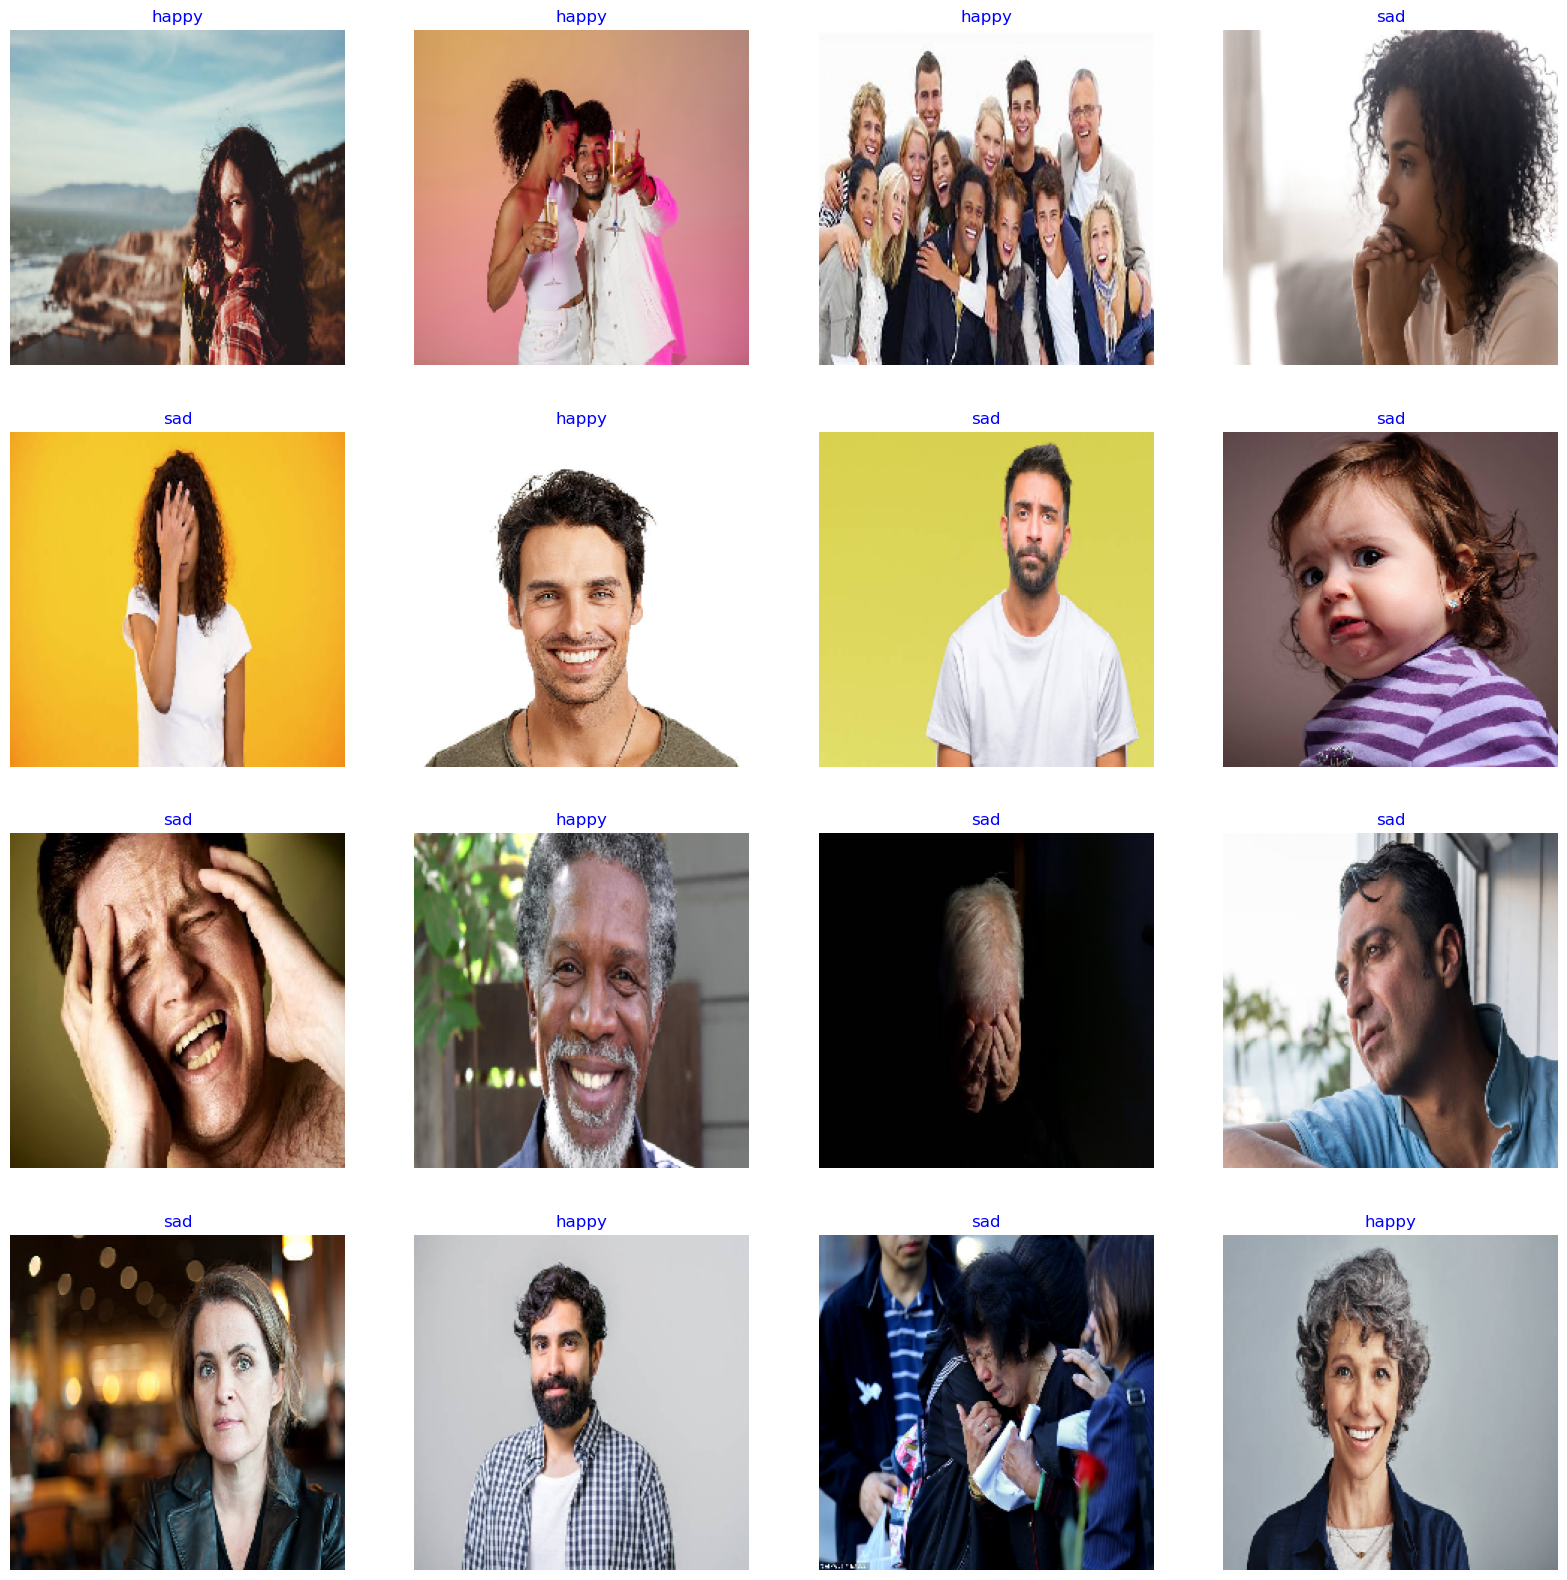

In [10]:
g_dict = tr_gen.class_indices      
classes = list(g_dict.keys())       
images, labels = next(ts_gen) 

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       
    plt.imshow(image)
    index = np.argmax(labels[i])  
    class_name = classes[index]   
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

In [11]:
base_model = EfficientNetB3(include_top=False, weights="imagenet",
                      input_shape= img_shape, pooling= 'max')

model = Sequential([
    base_model,
    Dense(512,activation= 'relu'),
    Dropout(rate= 0.40, seed= 20),
    Dense(2, activation= 'softmax')
])

for layer in base_model.layers:
    layer.trainable = False
    

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])


model.summary()

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)          │ (None, 1536)                │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,571,505 (44.14 MB)

 Trainable params: 787,970 (3.01 MB)

 Non-trainable params: 10,783,535 (41.14 MB)

In [14]:
logdir='logs'

In [15]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
#     layer.trainable = False
hist = model.fit(tr_gen, epochs=10, validation_data=valid_gen, callbacks=[tensorboard_callback])

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 290s 6s/step - accuracy: 0.6333 - loss: 3.4437 - precision_2: 0.6333 - recall_2: 0.6333 - val_accuracy: 0.6222 - val_loss: 1.7308 - val_precision_2: 0.6222 - val_recall_2: 0.6222
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 130s 6s/step - accuracy: 0.7092 - loss: 1.5159 - precision_2: 0.7092 - recall_2: 0.7092 - val_accuracy: 0.7333 - val_loss: 1.0393 - val_precision_2: 0.7333 - val_recall_2: 0.7333
Epoch 3/10
18/23 ━━━━━━━━━━━━━━━━━━━━ 18:15 219s/step - accuracy: 0.8458 - loss: 0.4528 - precision_2: 0.8458 - recall_2: 0.8458

In [ ]:
# layer.trainable[200: ] = True
hist = model.fit(tr_gen,
                 epochs=10,
                 validation_data=valid_gen,
                 shuffle= False,
                 callbacks=[tensorboard_callback])

In [ ]:
# layer.trainable = True
hist = model.fit(tr_gen,
                 epochs=25,
                 validation_data=valid_gen,
                 shuffle= False,
                 callbacks=[tensorboard_callback])

In [ ]:
plt.figure(figsize= (14, 14))

plt.subplot(2,2,1)
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.legend(loc="upper left")

plt.subplot(2,2,2)
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy', fontsize=20)
plt.xlabel('epochs')
plt.legend(loc="upper left")

plt.subplot(2,2,3)
plt.plot(hist.history['precision_5'], label='precision')
plt.plot(hist.history['val_precision_5'], label='val_precision')
plt.title('Precision', fontsize=20)
plt.xlabel('epochs')
plt.legend(loc="upper left")

plt.subplot(2,2,4)
plt.plot(hist.history['recall_5'], label='recall')
plt.plot(hist.history['val_recall_5'], label='val_recall')
plt.title('Recall', fontsize=20)
plt.xlabel('epochs')
plt.legend(loc="upper left")

plt.show()